In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [41]:
# P = [154.63999938964844, 102.73999786376952, 132.03836059570312, 167.42999267578125, 165.27687072753906]
# ret = [0.0008486303157126, 0.0021131492861289, 0.0006059270471465, 0.0014200809964434, 0.0005294127082475]
# cov = [[0.0002396631384819, 8.729467061648327e-05, 0.0001963734019772, 0.0001113713808017, 0.0001560458763834], [0.0003110298525054, 9.570027243962242e-05, 0.0002792987037854, 0.0001601098316792, 0.0002070030507592], [0.0001079197411337, 0.0001081726244116, 0.0001199600346667, 0.0002231518110868, 0.0001219413122987], [0.0002183159781519, 9.019796080530152e-05, 0.0002310210534298, 0.0001184711393639, 0.0001778121872653], [7.460989219783809e-05, 9.82394822386536e-05, 0.000110556365675, 8.645712047746874e-05, 0.0001226958799028]]

# P = [221.839096069336, 154.63999938964844, 576.3599853515625, 108.37999725341795, 259.1600036621094]
# ret = [0.0009879448195219, 0.0008486303157126, 0.0010614155824352, 0.0026181683830485, 0.0018678233702657]
# cov = [[0.0003221861173508, 0.0001963734019772, 0.0002234279136105, 0.0002961085766571, 0.0002775990389884], [0.0001963734019772, 0.0003271804859733, 0.0002704264166928, 0.0002978081109389, 0.0002481673693681], [0.0002234279136105, 0.0002704264166928, 0.0005636289268865, 0.0003530983883698, 0.0002829820809699], [0.0002961085766571, 0.0002978081109389, 0.0003530983883698, 0.0009699101885066, 0.0004609244627723], [0.0002775990389884, 0.0002481673693681, 0.0002829820809699, 0.0004609244627723, 0.0013339532736411]]

# P = [132.03836059570312, 190.259994506836, 131.78817749023438, 117.8446273803711, 207.60145568847656]
# ret = [0.0006059270471465, 0.0011351645428327, 0.0004725179051125, 0.0004608717239145, 0.0008120256727888]
# cov = [[0.0001081726244116, 0.0002231518110868, 0.00011429083745, 9.09320424341004e-05, 0.0001199600346667], [7.310639347255959e-05, 0.0001079197411337, 0.0001355984783555, 0.000133436300472, 0.0002068199355646], [8.894275331223788e-05, 9.156196651301436e-05, 0.0001166562593632, 0.0001346076205966, 0.0001111849232434], [8.487852403825025e-05, 6.813759785023826e-05, 0.0001084840912809, 0.0001290148394488, 9.49479885674414e-05], [0.0002765745127823, 0.0001081726244116, 9.035121381654192e-05, 6.63653812926671e-05, 8.180817952942668e-05]]

P = [366.489990234375, 310.50030517578125, 221.839096069336, 383.5299987792969, 267.9389953613281]
ret = [0.0006781792548849, 0.0006694411836587, 0.0009879448195219, 0.0008790738215909, 0.0007948524204784]
cov = [[0.0001315696299371, 0.0001068524208539, 0.0001379683374046, 0.0001374366508516, 0.0001571487659457], [0.0001541479971936, 0.0001219413122987, 0.0001543369843155, 0.000247292892208, 0.0001905006080117], [0.0002068199355646, 0.0001199600346667, 0.0003221861173508, 0.0001543369843155, 0.0002179815855158], [0.0002545406197348, 0.0001397902673107, 0.0002179815855158, 0.0001905006080117, 0.0004453003173316], [0.0002475234412567, 0.0001322031880758, 0.0001994205153886, 0.0001826599738954, 0.0003056883029433]]



B = 1

P = np.array(P)
ret = np.array(ret).reshape(-1, 1)
cov = np.array(cov)

In [ ]:
ret_list, cov_list = [],[]
for i in range(150000):
    buy = np.random.dirichlet(np.ones(len(P)))

    ret_list.append(ret.T @ buy)
    cov_list.append(buy.T @ cov @ buy)

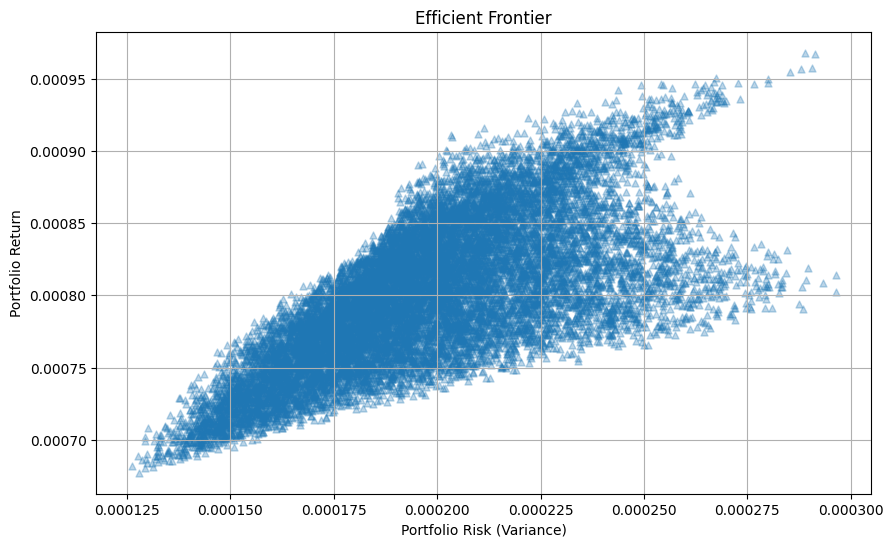

In [48]:
plt.figure(figsize=(10,6))
# Triangle
plt.scatter(np.array(cov_list), np.array(ret_list), s=25, alpha=0.3, label='Random Portfolios', marker='^')
# plt.colorbar(label='Portfolio Price')
plt.xlabel('Portfolio Risk (Variance)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

In [37]:
# convex hull
from scipy.spatial import ConvexHull
points = np.array(list(zip(cov_list, ret_list)))
hull = ConvexHull(points)
plt.figure(figsize=(10,6))
plt.scatter(points[:,0], points[:,1], s=10, label='Random Portfolios', marker='^')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.xlabel('Portfolio Risk (Variance)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier with Convex Hull')
plt.grid(True)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (150000, 2) + inhomogeneous part.

                             Date       Open       High        Low      Close  \
521800  2025-05-19 00:00:00-04:00  27.760000  28.040001  27.709999  28.020000   
521801  2025-05-20 00:00:00-04:00  28.049999  28.260000  27.750000  27.780001   
521802  2025-05-21 00:00:00-04:00  27.680000  27.770000  27.410000  27.469999   
521803  2025-05-22 00:00:00-04:00  27.580000  27.709999  27.209999  27.230000   
521804  2025-05-23 00:00:00-04:00  27.480000  27.530001  27.160000  27.420000   

          Volume  Dividends  Stock Splits Ticker Company_Name  \
521800  30996600        0.0           0.0      T    AT&T Inc.   
521801  24966600        0.0           0.0      T    AT&T Inc.   
521802  29684200        0.0           0.0      T    AT&T Inc.   
521803  25901600        0.0           0.0      T    AT&T Inc.   
521804  31763700        0.0           0.0      T    AT&T Inc.   

                        Sector          Industry    Market_Cap   PE_Ratio  \
521800  Communication Services  Telecom Servi

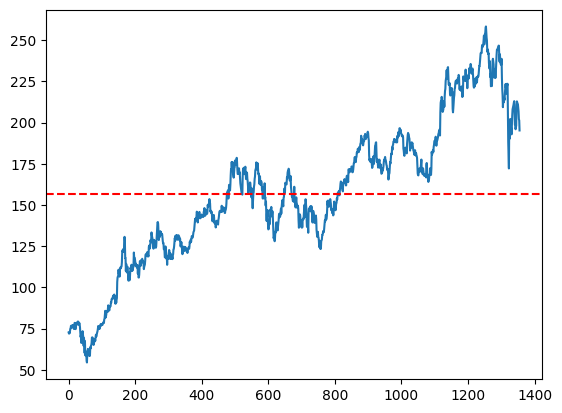

In [ ]:
data_ret_p_pd = pd.read_csv("../dataset/top_50_us_stocks_data_20250526_011226_with_returns.csv")
print(data_ret_p_pd.tail())
# select only 2015 - 2025
AAPL_price = data_ret_p_pd[(data_ret_p_pd['Ticker'] == 'AAPL') & (data_ret_p_pd['Date'] >= '2020-01-01') & (data_ret_p_pd['Date'] <= '2025-12-31')]['Close'].values
plt.plot(AAPL_price)
plt.axhline(y=np.mean(AAPL_price), color='r', linestyle='--', label='Mean Price')